Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 08

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, June 27, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

The second half of this sheet and the following Sheet 09 will be a recap of previous topics, to help you prepare for the final exam.

Also if you hit any question that should be discussed in more detail in the next practice session, please let us know.

## Assignment 0: Math recap (Conditional Probability) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of conditional probability. How is it defined?

In probability theory, conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion or evidence) occurred. If the event of interest is A and the event B is known or assumed to have occurred, "the conditional probability of A given B", or "the probability of A under the condition B", is usually written as P(A | B), or sometimes PB(A) or P(A / B).

**b)** What is Bayes' theorem? What are its applications?

In probability theory and statistics, Bayes' theorem (alternatively Bayes's theorem, Bayes's law or Bayes's rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

One of the many applications of Bayes’s theorem is Bayesian inference, a particular approach to statistical inference. When applied, the probabilities involved in Bayes’ theorem may have different probability interpretations. With Bayesian probability interpretation, the theorem expresses how a degree of belief, expressed as a probability, should rationally change to account for the availability of related evidence. 

**c)** What does the law of total probability state? 

The law of total probability is the proposition that if $\left\{{B_{n}:n=1,2,3,\ldots }\right\}$ is a finite or countably infinite partition of a sample space (in other words, a set of pairwise disjoint events whose union is the entire sample space) and each event $B_{n}$ is measurable, then for any event $A$ of the same probability space:
$$
P(A)=\sum _{n}P(A\cap B_{n})
$$
or, alternatively,
$$
P(A)=\sum _{n}P(A\mid B_{n})P(B_{n}),
$$
where, for any $n$ for which $P(B_{n})=0$ these terms are simply omitted from the summation, because $P(A\mid B_{n})$ is finite.

The summation can be interpreted as a weighted average, and consequently the marginal probability, $P(A)$, is sometimes called "average probability"; "overall probability" is sometimes used in less formal writings.

The law of total probability can also be stated for conditional probabilities.
$$
P(A\mid C)=\sum _{n}P(A\mid C\cap B_{n})P(B_{n}\mid C)
$$
Taking the $B_{n}$ as above, and assuming $C$ is an event independent of any of the $B_{n}$:

$$
P(A\mid C)=\sum _{n}P(A\mid C\cap B_{n})P(B_{n})
$$



## Assignment 1: MLP and RBFN [10 Points]

This exercise is aimed at deepening the understanding of Radial Basis Function Networks and how they relate to Multilayer Perceptrons. Not all of the answers can be found directly in the slides - so when answering the (more algorithmic) questions, first take a minute and think about how you would go about solving them and if nothing comes to mind search the internet for a little bit. If you are interested in a real life application of both algorithms and how they compare take a look at this paper: [Comparison between Multi-Layer Perceptron and Radial Basis Function Networks for Sediment Load Estimation in a Tropical Watershed](http://file.scirp.org/pdf/JWARP20121000014_80441700.pdf)

![Schematic of a RBFN](RBFN.png)

We have prepared a little example that shows how radial basis function approximation works in Python. This is not an example implementation of a RBFN but illustrates the work of the hidden neurons.

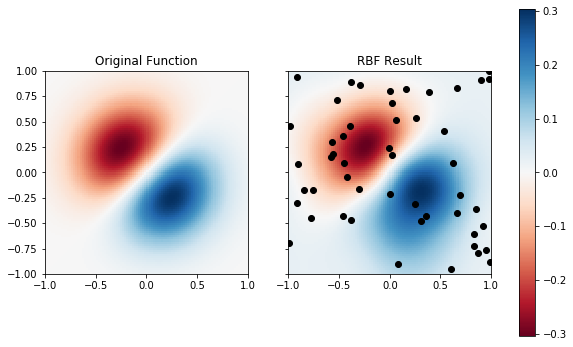

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import uniform

from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


def func(x, y):
    """
    This is the example function that should be fitted.
    Its shape could be described as two peaks close to
    each other - one going up, the other going down
    """
    return (x + y) * np.exp(-4.0 * (x**2 + y**2))


# number of training points (you may try different values here)
training_size = 50

# sample 'training_size' data points from the input space [-1,1]x[-1,1] ...
x = uniform(-1.0, 1.0, size=training_size)
y = uniform(-1.0, 1.0, size=training_size)

# ... and compute function values for them.
fvals = func(x, y)

# get the aprroximation via RBF
new_func = Rbf(x, y, fvals)


# Plot both functions:
# create a 100x100 grid of input values
x_grid, y_grid = np.mgrid[-1:1:100j, -1:1:100j]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
# This plot represents the original function
f_orig = func(x_grid, y_grid)
img = ax[0].imshow(f_orig, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[0].set(title='Original Function')
# This plots the approximation of the original function by the RBF
# if the plot looks strange try to run it again, the sampling
# in the beginning is random
f_new = new_func(x_grid, y_grid)
plt.imshow(f_new, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[1].set(title='RBF Result', xlim=[-1, 1], ylim=[-1, 1])
# scatter the datapoints that have been used by the RBF
plt.scatter(x, y, color='black')
fig.colorbar(img, ax=ax)
plt.show()

### Radial Basis Function Networks

#### What are radial basis functions?

A radial basis function (RBF) is a real-valued function $\varphi$ whose value depends only on the distance between the input and some fixed point, either the origin, so that $\varphi (\mathbf {x} )=\varphi (\left\|\mathbf {x} \right\|)$, or some other fixed point $\mathbf {c}$, called a center, so that $\varphi (\mathbf {x} )=\varphi (\left\|\mathbf {x} -\mathbf {c} \right\|)$. Any function $\varphi$ that satisfies the property $\varphi (\mathbf {x} )=\varphi (\left\|\mathbf {x} \right\|)$ is a radial function. The distance is usually Euclidean distance, although other metrics are sometimes used. They are often used as a collection $\{\varphi _{k}\}_{k}$ which forms a basis for some function space of interest, hence the name.

Sums of radial basis functions are typically used to approximate given functions. This approximation process can also be interpreted as a simple kind of neural network; this was the context in which they were originally applied to machine learning, in work by David Broomhead and David Lowe in 1988, which stemmed from Michael J. D. Powell's seminal research from 1977. RBFs are also used as a kernel in support vector classification. The technique has proven effective and flexible enough that radial basis functions are now applied in a variety of engineering applications.

#### What is the structure of a RBFN? You may also use the notion from the above included picture.

Radial basis function (RBF) networks typically have three layers: an input layer, a hidden layer with a non-linear RBF activation function and a linear output layer. The input can be modeled as a vector of real numbers $ \mathbf {x} \in \mathbb {R} ^{n}$. The output of the network is then a scalar function of the input vector, $\varphi :\mathbb {R} ^{n}\to \mathbb {R}$, and is given by

$$
\varphi (\mathbf {x} )=\sum _{i=1}^{N}a_{i}\rho (||\mathbf {x} -\mathbf {c} _{i}||)
$$

where $N$ is the number of neurons in the hidden layer, $\mathbf {c} _{i}$ is the center vector for neuron $i$, and $a_{i}$ is the weight of neuron $i$ in the linear output neuron. Functions that depend only on the distance from a center vector are radially symmetric about that vector, hence the name radial basis function. In the basic form all inputs are connected to each hidden neuron. The norm is typically taken to be the Euclidean distance (although the Mahalanobis distance appears to perform better with pattern recognitionand the radial basis function is commonly taken to be Gaussian

$$
\rho {\big (}\left\Vert \mathbf {x} -\mathbf {c} _{i}\right\Vert {\big )}=\exp \left[-\beta \left\Vert \mathbf {x} -\mathbf {c} _{i}\right\Vert ^{2}\right].
$$

The Gaussian basis functions are local to the center vector in the sense that

$$
\lim _{||x||\to \infty }\rho (\left\Vert \mathbf {x} -\mathbf {c} _{i}\right\Vert )=0
$$

i.e. changing parameters of one neuron has only a small effect for input values that are far away from the center of that neuron.

Given certain mild conditions on the shape of the activation function, RBF networks are universal approximators on a compact subset of $\mathbb {R} ^{n}$. This means that an RBF network with enough hidden neurons can approximate any continuous function on a closed, bounded set with arbitrary precision.

The parameters $a_{i}$, $\mathbf {c} _{i}$, and $\beta _{i}$ are determined in a manner that optimizes the fit between $\varphi$ and the data. 

#### How is a RBFN trained?

Training concerns three tasks:
1. Find suitable “centers” or input weights $\xi_i \in \mathbb{R}^{d_{in}}$.
2. Find suitable “radii of influence” $\sigma_i$.
3. Find output weights $w_i \in \mathbb{R}^{d_{out}}$ to form output.


### Comparison to the Multilayer Perceptron

#### What do both models have in common? Where do they differ?

### Effect of an adaptation step:

* **RBF**: Only input component acts locally on one / some basis
    functions $\rightarrow$ affects only performance on data in this input area.
* **MLP**: Input-output pair may change all weights $\rightarrow$ may affect performance on all data.

### Both have architectural parameters:

* **RBF**: One easy to interpret parameter (# basis functions)
* **MLP**: # layers, # neurons in each layer, interpretation difficult.

### Both have adaptation parameters:
* **RBF**:

    * Clustering parameters,
    * radii,
    * stepsize for supervised training.

* **MLP**:

    * Stepsize,
    * various others such as momentum.
$\rightarrow$ Parameters of RBFs are decoupled and easy to interpret.
$\rightarrow$ Effect of MLP parameters is difficult to predict as they interact in a complex way during the minimization.


#### How can classification in both networks be visualized?

Color-coding via coordinate projections (?)

#### When would you use a RBFN instead of a Multilayer Perceptron?

YOUR ANSWER HERE

## Recap 1: Concept Learning [2 Points]

### a) Concept Learning

What is Concept Learning? Is it supervised? Is it local?

Concept learning is the learning of a general concept based on specific examples.

Since it is entirely based on examples it is not supervised.

Since the goal of this is to learn a general concept, it is aimed at approximating unobserved examples. (not local).

### b) Find-S
Describe the Find-S Algorithm in pseudo code. What is its inductive bias? What are its advantages and drawbacks?

```Python
(Most specific) hypothesis in Hypotheses-Space:
    for p_instance in X_instances: 
        for attribute in hypothesis:
            if( attribute not satisfied by p_instance)
                replace attribute with next more general constraint satisfied by p_instance.
return hypothesis.
```

Its inductive bias is learning specifically the most specific hypothesis for a certain training sample (we assume that $H$ somehow contains the target concept), which most likely won't apply for a not-yet-observed sample/example.

* Find-S learns nothing from negative examples.
* Can’t tell whether it has learned the concept.
* Can’t tell whether training data is inconsistent.
* Picks maximally specific h.
* Depending on H, there might be several solutions.


### c) Hypotheses space

What is the hypotheses space for Candidate-Elimination used in the lecture?

It is the space delimited by the (at the moment) most specific set of hypotheses $S$ and most general set of hypotheses $G$.

## Recap 2: Decision Trees [2 Points]

### a) Overfitting
What is overfitting? How can it be avoided?

Overfitting is the accomodation of a function/hypotheses to a dataset, making it unnecessarily slower, since it just accomodates a few outliers or maybe even noisy data/errors.

It can be avoided by stopping the growth of the function, when the data split is no longer statistically significant or by post-pruning data once the growth is finished.

### b) Pruning

Name one method for pruning a decision tree and describe it!

Rule post pruning:
1. Build up decision tree to fit training set as well as possible, allowing overfitting.
2. Convert tree into equivalent set of rules: One rule for each path from root to leaf.
3. Prune each rule (independently of others) by removing any preconditions that result in improving its accuracy on the validation set.
4. Sort final rules by their accuracy on validation set. Apply them in this order when classifying new instances.


### c) Information gain
What are entropy and information gain? Provide explanation and formulae. How are they used in ID3?

**Entropy** is the "impurity" provided by a set of training examples. This means, that it tells us the expected number of bits needed to enconde a random $s \in S$.
$$E(S) = -p_+log_2p_+ - p_-log_2p_-$$

**Information gain** is the expected reduction in entropy due to sorting on $A$ (an **A**tribute on the set with respect of a specific value).
$$
Gain(S, A) = E(S) - \sum_{v \in Values(A)} E(S) \cdot \frac{|S_v|}{|S|}
$$


They are used both in ID3 by making the optimal tree structure based on the most gain per attribute. (attributes with the most gain, are closer to the root)

## Recap 3: Data Mining [2 Points]

### a) Missing values

How can you deal with missing values? Name an important algorithm and explain how to use it.

To deal with missing values, one must fill them in manually.

**Expectation Maximization(EM)**

Procedure:
1. Choose a function to approximate $P(x,y | \theta)$ with parameters $\theta$.
2. Choose start values $\theta_t$.
3. Initialize step counter $t = 0$.
4. E-step: Calculate the integral of 
$$
Q(\theta ,\theta_t) =
 \int P(h | x,\theta_t) \cdot log P(h | x,\theta ) dh
 + log P(x | \theta )
 $$
to obtain the function $Q$ depending on $\theta$ and $\theta_t$.
5. M-step: Maximize $Q$ with respect to $\theta$ :
$$
\theta_{t+1} = argmax_\theta Q(\theta,\theta_t).
$$
6. `t++`.
7. If $Q(\theta,\theta_t)$ does not meet the convergence condition goto **4**.


### b) Outliers

What are outliers? Can we detect them? If so, how?

Outliers are very few instances of training examples which have values differ greatly with that of other training examples, but which end up having a too big of an influence on the statistics and subsequently spoiling them.

They can be detected using different measures like:
* **Rossner test and z-test**: get the distance of all data to the mean in terms of the standard deviation, and based on an arbitrary threshold, the outliers are detected. Do it recursively until there is no longer any data that passes the threshold.

### c) Expectation Maximization
What does the Q-function express in the EM algorithm?

$Q$ represents the average likelyhood. This means, that $Q$ shows us how likely it is that our currently calculated distribution $\theta_t$ has already converged to the expected distribution $\theta$.

## Recap 4: Clustering [4 Points]

### a) Clustering

Explain the difference between single-linkage and complete-linkage clustering.

Single linkage is based in the minimum distance between two clusters while complete-linkage is based on the maximum distance.

### b) Metrics

Name three different distance measures and briefly explain them. Check the metric axioms for one of them.

Distance functions have the form 
$$
d_{xy} = \sqrt[p]{ \sum_{i \in D} (x_i - y_i)^p }
$$
Where $D$ is the dimensionality of the data.

Euklidian distance: Above function with $p = 2$.
...

#### Axioms
* **Symetry**: $d_{xy} = d_{yx}$
* **Coincidence**: $d_{xy} = 0 \Leftrightarrow x = y$
* **Triangle equation**: $d_{xz} + d_{yz} \geq d_{xy}$

### c) Mixture models

What is a mixture model? Explain. Can you provide a formula?

YOUR ANSWER HERE

## Recap 5: Dimension Reduction [2 Points]

### a) Visualization

Name three different data visualization techniques to visualize high dimensional data. Explain one in detail.

* Glyphs:
    * Star glyphs
* Eigenfaces:
    Assign a a dimension's attribute to a particular facial attribute (size of eyes, separation of eyes, mouth size/position, etc...) and draw the faces representing the data based on all combinations of the dimensions. Since the human brain is a face-recognizing machine, it is easier for us to identify particular facial expresions on the data represented.
* Bar graph representation

### b) PCA

Draw a few data points (ASCII arts or on a sheet of paper) and mark the principal components. What are the principal components?

Principal component analysis is the finding of the subspace which captures most of the data variance, allowing for the reduction of the dimensionality of a dataset.

### c) Covariance matrix
What does a covariance matrix express? How is it computed from data? How is it used in PCA?

A covariance matrix expresses the data variance dataset with respect of all their respective attributes on said dataset (including the data point with itself).

It is calculated so:
$$
C_{xy} = \sum_{i=1}^n (x_i - \mu_x) \cdot (y_i - \mu_y)
$$
$C$ = the covariance from x and y  
$x,y$ = datapoints  
$\mu$ = the median of that respective datapoint  